In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sb
import sklearn
import warnings

In [3]:
dataframe = pd.read_csv(r"C:\Users\sonik\Desktop\Machine Learning\Sample .CSV Data Files\data_science_student_marks.csv")
dataframe

,student_id,location,age,sql_marks,excel_marks,python_marks,power_bi_marks,english_marks
0,4,Sydney,24,95,99,87,82,75
1,5,Tokyo,24,99,95,89,86,82
2,6,Berlin,22,72,70,99,79,77
3,7,London,23,97,90,74,72,85
4,8,Tokyo,22,91,71,79,80,75
...,...,...,...,...,...,...,...,...
492,496,New York,23,71,92,98,78,88
493,497,Los Angeles,20,90,100,90,78,73
494,498,Paris,22,78,80,78,71,70
495,499,Los Angeles,21,96,93,78,78,82


In [4]:
warnings.filterwarnings('ignore')

In [5]:
p = dataframe.drop(columns = 'location')
x = p.drop(columns = 'age')
y = dataframe['age']

In [6]:
x.head()

,student_id,sql_marks,excel_marks,python_marks,power_bi_marks,english_marks
0,4,95,99,87,82,75
1,5,99,95,89,86,82
2,6,72,70,99,79,77
3,7,97,90,74,72,85
4,8,91,71,79,80,75


In [7]:
y.head()

0    24
1    24
2    22
3    23
4    22
Name: age, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

In [9]:
x_test

,student_id,sql_marks,excel_marks,python_marks,power_bi_marks,english_marks
287,291,78,73,90,82,91
406,410,93,99,81,76,73
87,91,100,95,81,86,70
392,396,99,86,95,79,79
19,23,80,73,94,89,100
...,...,...,...,...,...,...
54,58,87,74,82,100,82
296,300,77,76,86,86,73
202,206,78,99,82,72,86
365,369,75,85,94,100,82


In [10]:
y_test

287    25
406    25
87     21
392    21
19     18
       ..
54     24
296    19
202    23
365    19
172    18
Name: age, Length: 100, dtype: int64

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [12]:
y_predict = regressor.predict (x_test)
y_predict

array([21.46503291, 20.9275939 , 21.54401944, 21.1979786 , 21.85591558,
       21.16662524, 21.91686707, 21.17821917, 21.85782273, 21.36473166,
       21.72975061, 21.4901391 , 21.38414858, 21.29971609, 21.72482554,
       21.66360514, 21.29350601, 21.51187824, 21.22444365, 21.22925675,
       21.28396098, 21.17827769, 21.32037067, 21.22664519, 21.14135168,
       21.51757735, 21.31902835, 21.60172392, 21.25624124, 21.14693627,
       21.44753046, 20.8176408 , 21.17119111, 21.51715016, 21.21185852,
       20.8930868 , 21.23608921, 21.21471506, 21.10964649, 21.59009185,
       21.3090972 , 20.76905574, 21.08249574, 21.14554572, 21.65154027,
       20.98243936, 21.95522325, 21.47776089, 21.79767416, 21.15178874,
       21.03905633, 21.36331548, 21.41858626, 21.59371227, 21.18024355,
       21.71391564, 21.26635665, 21.69919992, 21.49486822, 21.38619106,
       21.60773497, 21.35650633, 21.80891231, 21.54821528, 20.98290754,
       21.39955507, 20.86227563, 21.17429125, 21.22016747, 21.21

In [13]:
# use a row from x_test to ensure correct shape & feature order
sample = x_test.iloc[[0]]          # DataFrame with shape (1, n_features)
print("Input features:", sample.columns.tolist())
print("Sample values:\n", sample)
pred = regressor.predict(sample)
print("Prediction:", pred)

Input features: ['student_id', 'sql_marks', 'excel_marks', 'python_marks', 'power_bi_marks', 'english_marks']
Sample values:
      student_id  sql_marks  excel_marks  python_marks  power_bi_marks  \
287         291         78           73            90              82   

     english_marks  
287             91  
Prediction: [21.46503291]


In [14]:
x_train_array = np.array(x_train)
x_train_array

array([[156,  91,  79,  78,  94,  97],
       [ 95,  84,  92,  90,  87,  77],
       [310, 100,  81,  74,  88,  70],
       ...,
       [348,  71,  81,  72,  75,  87],
       [210,  88,  84,  96,  73,  84],
       [347,  81,  91,  86,  85,  78]], shape=(397, 6))

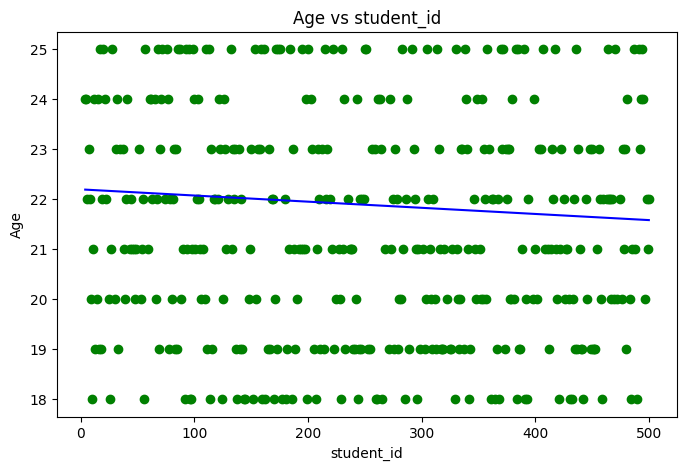

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(8, 5))
plt.scatter(x_train.iloc[:, 0], y_train, color="green", label="Training Data")
plt.xlabel(x_train.columns[0])
plt.ylabel("Age")
plt.title("Age vs " + x_train.columns[0])
# Regression line (using only the first feature for visualization)
x_vals = np.linspace(x_train.iloc[:, 0].min(), x_train.iloc[:, 0].max(), 100).reshape(-1, 1)
y_vals = regressor.predict(
    np.hstack([x_vals, np.zeros((x_vals.shape[0], x_train.shape[1] - 1))]))
plt.plot(x_vals, y_vals, color="blue", label="Regression Line")
plt.show()

In [16]:
x_test_array = np.array(x_test)
x_test_array

array([[291,  78,  73,  90,  82,  91],
       [410,  93,  99,  81,  76,  73],
       [ 91, 100,  95,  81,  86,  70],
       [396,  99,  86,  95,  79,  79],
       [ 23,  80,  73,  94,  89, 100],
       [226,  74,  96,  98,  88,  79],
       [119,  86,  74,  83, 100,  91],
       [382,  81,  84,  81,  80,  90],
       [ 75,  99,  79,  92,  92,  84],
       [143,  72,  98,  76,  98,  95],
       [220,  97,  75,  75,  87,  87],
       [ 60,  95,  94,  94,  83,  78],
       [191,  79,  91,  86,  90,  79],
       [324,  97,  94,  90,  94,  82],
       [193,  91,  76,  88,  93,  95],
       [ 64,  71,  71,  94,  75,  84],
       [155,  80,  89,  90,  77,  97],
       [ 34,  83,  99,  82,  93,  71],
       [258,  80, 100,  98, 100,  75],
       [164,  74,  95,  93,  84,  81],
       [163,  87,  95,  97,  85,  96],
       [474,  78,  87,  79,  94,  70],
       [344,  96,  83,  86,  78,  74],
       [267,  90,  94,  97,  85,  73],
       [406,  89,  80,  92,  71,  90],
       [218,  74,  74,  8

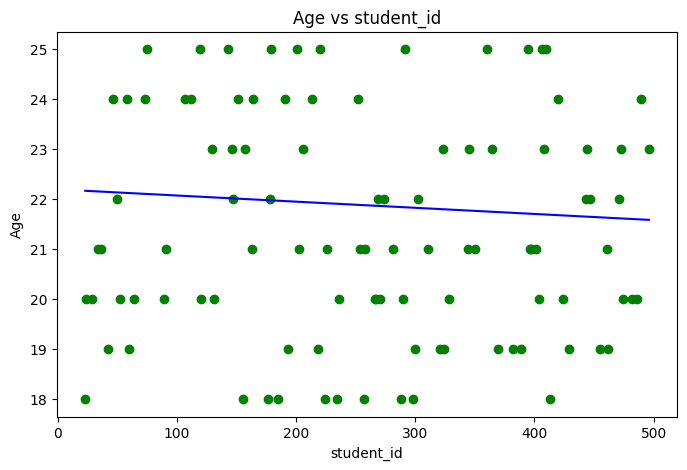

In [17]:
plt.figure(figsize=(8, 5))
plt.scatter(x_test.iloc[:, 0], y_test, color="green", label="Test Data")
plt.xlabel(x_test.columns[0])
plt.ylabel("Age")
plt.title("Age vs " + x_test.columns[0])

# Regression line (using only the first feature for visualization)
x_vals = np.linspace(x_test.iloc[:, 0].min(), x_test.iloc[:, 0].max(), 100).reshape(-1, 1)
y_vals = regressor.predict(
    np.hstack([x_vals, np.zeros((x_vals.shape[0], x_test.shape[1] - 1))])
)
plt.plot(x_vals, y_vals, color="blue", label="Regression Line")
plt.show()

In [18]:
from sklearn.metrics import r2_score, mean_absolute_error

In [19]:
mean_absolute_error(y_test, y_predict)

1.8978605820416976

In [20]:
r2_score(y_test, y_predict)

-0.00873985874832961

In [21]:
y = np.array([[10]])

In [26]:
y_predict = regressor.predict(x)
y_predict

array([21.48242727, 21.60323815, 21.79795366, 21.56753208, 21.95937601,
       21.81787635, 21.69158273, 21.50538786, 21.51251767, 21.9431904 ,
       21.98418271, 21.55583829, 21.5279122 , 21.79233559, 21.94198353,
       21.48987537, 21.61129719, 21.31610226, 21.73170007, 21.85591558,
       21.69919992, 21.34911582, 21.66486692, 21.74356563, 21.80320526,
       21.65154027, 21.39084224, 21.71026876, 21.95915753, 21.40717865,
       21.51187824, 21.91178295, 21.60773497, 21.56260186, 21.46860879,
       21.44971318, 21.86776509, 21.85052824, 21.35650633, 21.51371885,
       21.69374611, 21.83422478, 21.56558775, 21.83864753, 21.79462953,
       22.02698998, 21.95522325, 21.40648845, 21.544888  , 21.74291945,
       21.67546409, 21.75197892, 21.50772814, 21.61454074, 22.01416099,
       21.45520287, 21.4901391 , 21.76212645, 21.717505  , 21.40812993,
       21.66360514, 21.20458874, 21.36930801, 21.78687362, 21.82272854,
       21.87917574, 21.42442209, 21.3340401 , 21.92619274, 21.54

In [ ]:
pickle.dump(regressor,open('simple linear regression model 123 ',mode='wb'))